170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 86s 1us/step
 CIFAR-10 dataset loaded successfully!


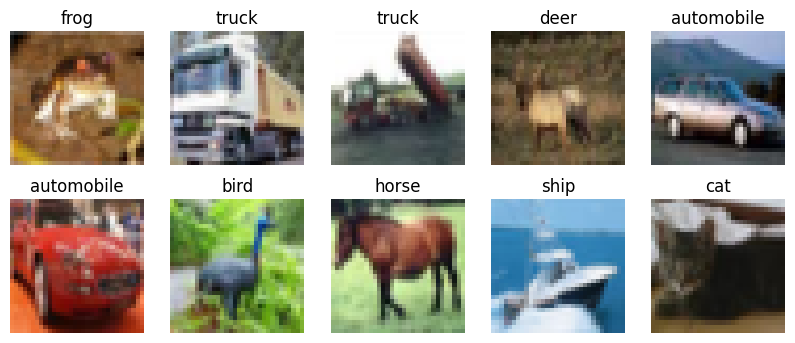

d:\machine learning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



 Training started...

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.4479 - loss: 1.5301 - val_accuracy: 0.5776 - val_loss: 1.1997
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.5840 - loss: 1.1816 - val_accuracy: 0.6247 - val_loss: 1.0578
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6292 - loss: 1.0569 - val_accuracy: 0.6525 - val_loss: 0.9861
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.6616 - loss: 0.9674 - val_accuracy: 0.6624 - val_loss: 0.9599
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.6864 - loss: 0.8979 - val_accuracy: 0.6943 - val_loss: 0.8832
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.7033 - loss: 0.8437 - val_accuracy: 0.6901 - val_loss: 0.9039
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.7223 - loss: 0.7946 - val_accuracy: 0.7041 - val_loss: 0.8621
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0

 Test Accuracy: 71.71%
 Model saved as 'cifar10_cnn_model.h5'


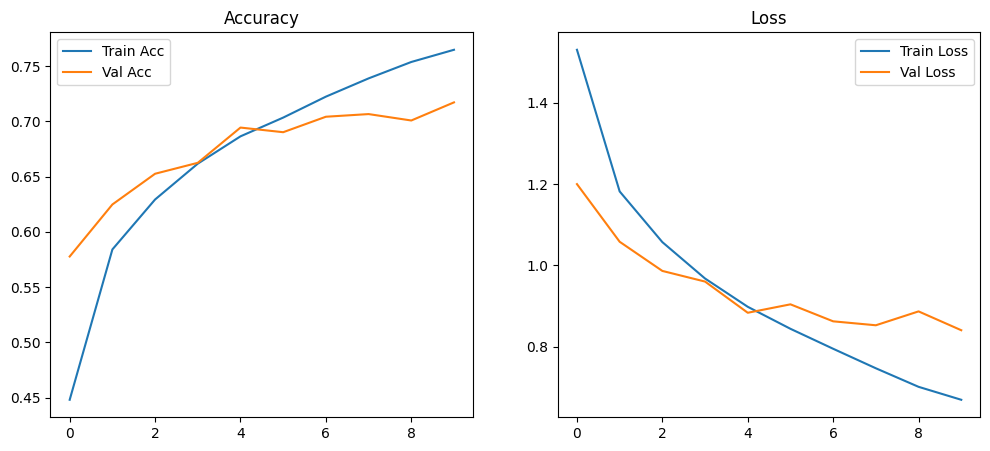

In [1]:


import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

#  Load Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(" CIFAR-10 dataset loaded successfully!")

#  Normalize & One-Hot Encode
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define Class Names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

#  Visualize Some Images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()

# Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

#  Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#  Train Model
print("\n Training started...\n")
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)
print("\n Training completed!\n")

#  Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f" Test Accuracy: {test_acc*100:.2f}%")

#  Save Model
model.save('cifar10_cnn_model.h5')
print(" Model saved as 'cifar10_cnn_model.h5'")

#  Plot Training Accuracy & Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()
